C:\Users\oskar\AppData\Local\Temp\ipykernel_28260\2439692009.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_1 = df_1.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
C:\Users\oskar\AppData\Local\Temp\ipykernel_28260\2439692009.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_05 = df_05.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
C:\Users\oskar\AppData\Local\Temp\ipykernel_28260\2439692009.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curren

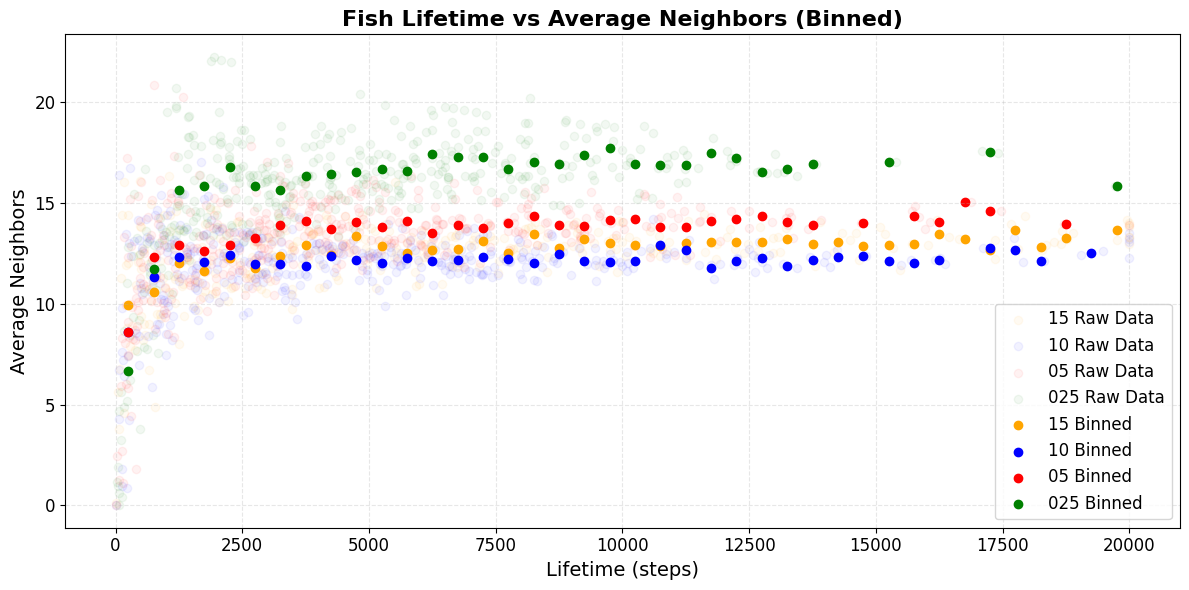

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from CSV files
df_1 = pd.read_csv('Data_1312/fish_data_1_1312.csv')
df_05 = pd.read_csv('Data_1312/fish_data_05_1312.csv')
df_025 = pd.read_csv('Data_1312/fish_data_025_1312.csv')
df_15 = pd.read_csv('Data_1312/fish_data_15_1312.csv')
max_lifetime = np.array([df_1['Lifetime'].max(), df_05['Lifetime'].max(), df_025['Lifetime'].max(),df_15['Lifetime'].max()]).max()

# Define bin edges: 0, 100, 200, ..., up to the maximum 'Lifetime'
bins = np.arange(0, max_lifetime + 500, 500)  # e.g., [0, 100, 200, ..., max_lifetime]

# Assign bins to 'Lifetime' for each dataset
df_1['Lifetime_Bin'] = pd.cut(df_1['Lifetime'], bins=bins, right=False)
df_05['Lifetime_Bin'] = pd.cut(df_05['Lifetime'], bins=bins, right=False)
df_025['Lifetime_Bin'] = pd.cut(df_025['Lifetime'], bins=bins, right=False)
df_15['Lifetime_Bin'] = pd.cut(df_15['Lifetime'], bins=bins, right=False)
# Aggregate mean 'Average Neighbors' per 'Lifetime_Bin'
binned_1 = df_1.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
binned_05 = df_05.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
binned_025 = df_025.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
binned_15 = df_15.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
# Calculate bin midpoints for plotting
def bin_midpoint(bin_interval):
    return bin_interval.left + (bin_interval.right - bin_interval.left) / 2

binned_1['Lifetime_Mid'] = binned_1['Lifetime_Bin'].apply(bin_midpoint)
binned_05['Lifetime_Mid'] = binned_05['Lifetime_Bin'].apply(bin_midpoint)
binned_025['Lifetime_Mid'] = binned_025['Lifetime_Bin'].apply(bin_midpoint)
binned_15['Lifetime_Mid'] = binned_15['Lifetime_Bin'].apply(bin_midpoint)
# Create the scatter and line plot
plt.figure(figsize=(12, 6))

# Scatter plot of raw data
plt.scatter(df_15['Lifetime'], df_15['Average Neighbors'], color='orange', alpha=0.05, label='15 Raw Data')
plt.scatter(df_1['Lifetime'], df_1['Average Neighbors'], color='blue', alpha=0.05, label='10 Raw Data')
plt.scatter(df_05['Lifetime'], df_05['Average Neighbors'], color='red', alpha=0.05, label='05 Raw Data')
plt.scatter(df_025['Lifetime'], df_025['Average Neighbors'], color='green', alpha=0.05, label='025 Raw Data')

# Line plot of binned averages
plt.scatter(binned_15['Lifetime_Mid'], binned_15['Average Neighbors'], color='orange', marker='o', label='15 Binned')
plt.scatter(binned_1['Lifetime_Mid'], binned_1['Average Neighbors'], color='blue', marker='o', label='10 Binned')
plt.scatter(binned_05['Lifetime_Mid'], binned_05['Average Neighbors'], color='red', marker='o', label='05 Binned')
plt.scatter(binned_025['Lifetime_Mid'], binned_025['Average Neighbors'], color='green', marker='o', label='025 Binned')

# Add titles and labels
plt.title('Fish Lifetime vs Average Neighbors (Binned)', fontsize=16, fontweight='bold')
plt.xlabel('Lifetime (steps)', fontsize=14)
plt.ylabel('Average Neighbors', fontsize=14)

# Customize ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(0, max_lifetime)
# plt.ylim(0, 100)
# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
